In [98]:
import numpy as np
import cv2
import os
import glob
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import pandas as pd


In [99]:
import pandas as pd
test = pd.read_csv("test_csv")
train = pd.read_csv("train_csv")

In [60]:
test

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B
...,...,...,...,...,...,...,...,...
8759,VID_2944,111205,471,14,101,2011-04-19,PT3M14S,C
8760,VID_8195,1074457,1024,195,65,2016-06-03,PT2H18M35S,D
8761,VID_18973,1891692,4606,1109,191,2016-06-26,PT7M14S,F
8762,VID_5849,714859,1639,151,382,2016-03-23,PT3M15S,D


In [61]:
train

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [62]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [63]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [64]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      14999 non-null  object
 1   adview     14999 non-null  int64 
 2   views      14999 non-null  object
 3   likes      14999 non-null  object
 4   dislikes   14999 non-null  object
 5   comment    14999 non-null  object
 6   published  14999 non-null  object
 7   duration   14999 non-null  object
 8   category   14999 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.0+ MB


In [65]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [66]:
train.isnull().sum()


vidid        0
adview       0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [67]:
test.isnull().sum()

vidid        0
views        0
likes        0
dislikes     0
comment      0
published    0
duration     0
category     0
dtype: int64

In [68]:
test = pd.read_csv("test_csv")

In [69]:
train = pd.read_csv("train_csv")

In [70]:
train.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [71]:
test.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [72]:
import pandas as pd

In [73]:
numeric_cols = ['views', 'likes', 'dislikes', 'comment']

In [74]:
for col in numeric_cols:
    print(f"Unique values in {col} column:")
    print(train[col].unique())


Unique values in views column:
['1031602' '1707' '2023' ... '665673' '3479' '963']
Unique values in likes column:
['8523' '56' '25' ... '18677' '1137' '3849']
Unique values in dislikes column:
['363' '2' '0' ... '2124' '1046' '584']
Unique values in comment column:
['1095' '6' '2' ... '1777' '1686' '3971']


In [76]:
for col in numeric_cols:
    print(f"Unique values in {col} column:")
    print(test[col].unique())


Unique values in views column:
['440238' '1040132' '28534' ... '1891692' '714859' '5297']
Unique values in likes column:
['6153' '8171' '31' ... '888' '6085' '4606']
Unique values in dislikes column:
['218' '340' '11' ... '1425' '1069' '1109']
Unique values in comment column:
['1377' '1047' '1' ... '265' '2400' '534']


In [77]:

for col in numeric_cols:
    train[col] = train[col].astype(str).str.replace(',', '').str.strip()  
    train[col] = pd.to_numeric(train[col], errors='coerce').fillna(0)  
    
    test[col] = test[col].astype(str).str.replace(',', '').str.strip() 
    test[col] = pd.to_numeric(test[col], errors='coerce').fillna(0)

# Check conversion
print(train[numeric_cols].dtypes)
print(train[numeric_cols].head())


views       float64
likes       float64
dislikes    float64
comment     float64
dtype: object
       views   likes  dislikes  comment
0  1031602.0  8523.0     363.0   1095.0
1     1707.0    56.0       2.0      6.0
2     2023.0    25.0       0.0      2.0
3   620860.0   777.0     161.0    153.0
4      666.0     1.0       0.0      0.0


In [78]:
from sklearn.preprocessing import LabelEncoder

# Label Encoder initialize 
encoder = LabelEncoder()

# 'category' column ko encode 
train['category'] = encoder.fit_transform(train['category'])
test['category'] = encoder.transform(test['category'])

# Category encoding check 
print(train[['category']].head())
print(test[['category']].head())


   category
0         5
1         3
2         2
3         7
4         3
   category
0         1
1         5
2         3
3         6
4         1


In [79]:
# Remove unwanted columns
train.drop(['vidid', 'published', 'duration'], axis=1, inplace=True)
test.drop(['vidid', 'published', 'duration'], axis=1, inplace=True)

# Check final dataset structure
print(train.head())
print(test.head())


   adview      views   likes  dislikes  comment  category
0      40  1031602.0  8523.0     363.0   1095.0         5
1       2     1707.0    56.0       2.0      6.0         3
2       1     2023.0    25.0       0.0      2.0         2
3       6   620860.0   777.0     161.0    153.0         7
4       1      666.0     1.0       0.0      0.0         3
       views   likes  dislikes  comment  category
0   440238.0  6153.0     218.0   1377.0         1
1  1040132.0  8171.0     340.0   1047.0         5
2    28534.0    31.0      11.0      1.0         3
3  1316715.0  2284.0     250.0    274.0         6
4  1893173.0  2519.0     225.0    116.0         1


In [80]:
# Features (X) aur target (y) define 
X = train.drop(['adview'], axis=1)
y = train['adview']

# Data structure check 
print("Feature Shape:", X.shape)
print("Target Shape:", y.shape)


Feature Shape: (14999, 5)
Target Shape: (14999,)


In [81]:
print("Columns in X:", X.columns)
print("Columns in test_df:", test.columns)

print("\nShape of X:", X.shape)
print("Shape of test_df:", test.shape)


Columns in X: Index(['views', 'likes', 'dislikes', 'comment', 'category'], dtype='object')
Columns in test_df: Index(['views', 'likes', 'dislikes', 'comment', 'category'], dtype='object')

Shape of X: (14999, 5)
Shape of test_df: (8764, 5)


In [82]:
print("Columns in X:", X.columns)
print("Columns in test_df:", train.columns)

print("\nShape of X:", X.shape)
print("Shape of test_df:", train.shape)

Columns in X: Index(['views', 'likes', 'dislikes', 'comment', 'category'], dtype='object')
Columns in test_df: Index(['adview', 'views', 'likes', 'dislikes', 'comment', 'category'], dtype='object')

Shape of X: (14999, 5)
Shape of test_df: (14999, 6)


In [83]:
# Ensure test_df has same columns as X
test = test[X.columns]  


In [85]:
from sklearn.preprocessing import StandardScaler

# StandardScaler initialize 
scaler = StandardScaler()

# Sirf numeric features select 
X_scaled = scaler.fit_transform(X)  
X_test_scaled = scaler.transform(test)  

print("Feature scaling complete!")


Feature scaling complete!


In [86]:
from sklearn.decomposition import PCA


In [88]:
from sklearn.decomposition import PCA  

# PCA apply 
pca = PCA(n_components=5)  
X_pca = pca.fit_transform(X_scaled)  
X_test_pca = pca.transform(X_test_scaled)  

# Check shape
print("PCA Applied Successfully!")
print("Shape of X_pca:", X_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)


PCA Applied Successfully!
Shape of X_pca: (14999, 5)
Shape of X_test_pca: (8764, 5)


In [89]:
from sklearn.model_selection import train_test_split


In [90]:
from sklearn.model_selection import train_test_split  

# Train-test split apply 
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Check split data
print("Training Samples:", X_train.shape)
print("Validation Samples:", X_val.shape)


Training Samples: (11999, 5)
Validation Samples: (3000, 5)


In [91]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN model define 
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(1, activation='linear')  # Output layer
])

# Model compile 
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Model summary 
model.summary()


C:\Users\ASUS\anconda  installer\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 128)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,089 (35.50 KB)

 Trainable params: 9,089 (35.50 KB)

 Non-trainable params: 0 (0.00 B)

In [104]:
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_val, y_val))

print("Model training complete!")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 869235008.0000 - mae: 3390.0498 - val_loss: 10756557824.0000 - val_mae: 5070.2266
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1134327552.0000 - mae: 3845.3518 - val_loss: 10756472832.0000 - val_mae: 5030.0586
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1064336064.0000 - mae: 3533.3931 - val_loss: 10756494336.0000 - val_mae: 5041.7612
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 1163073280.0000 - mae: 3431.7717 - val_loss: 10756210688.0000 - val_mae: 5078.6299
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 355937600.0000 - mae: 2740.8872 - val_loss: 10756291584.0000 - val_mae: 5145.4556
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 566091264.0000 - mae: 3358.4048 - val_loss: 10756238336.0000 - val_mae: 5124.6182
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 1072447360.0000 - mae: 3663.5332 - val_loss: 10756028416.0000 - va

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14467048448.0000 - mae: 5893.8315
Validation MAE: 5103.12646484375


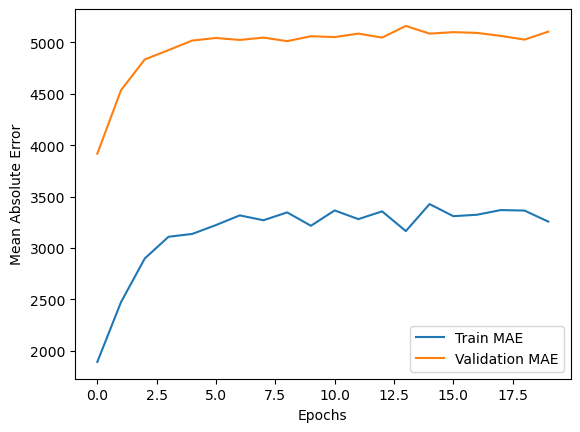

In [102]:
# Model evaluation
loss, mae = model.evaluate(X_val, y_val)
print(f"Validation MAE: {mae}")

# Accuracy plot 
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()


In [106]:
test_predictions = model.predict(X_test_pca)
test['predicted_adviews'] = test_predictions

# Predictions ko save karo
test.to_csv("predicted_adviews.csv", index=False)

print("Predictions saved to predicted_adviews.csv!")


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predictions saved to predicted_adviews.csv!


In [108]:
def predict_new_sample(model, sample_data, pca, scaler):
    sample_scaled = scaler.transform([sample_data])
    sample_pca = pca.transform(sample_scaled)
    prediction = model.predict(sample_pca)
    return prediction
sample = X.iloc[0] 
predicted_value = predict_new_sample(model, sample, pca, scaler)
print(f"Predicted Ad Views: {predicted_value}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


C:\Users\ASUS\anconda  installer\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Ad Views: [[1812.2627]]


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


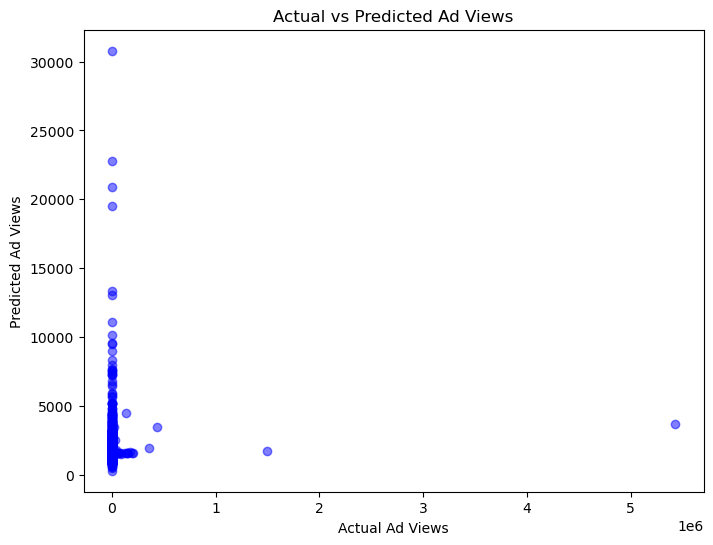

In [109]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_val, model.predict(X_val), alpha=0.5, color="blue")
plt.xlabel("Actual Ad Views")
plt.ylabel("Predicted Ad Views")
plt.title("Actual vs Predicted Ad Views")
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


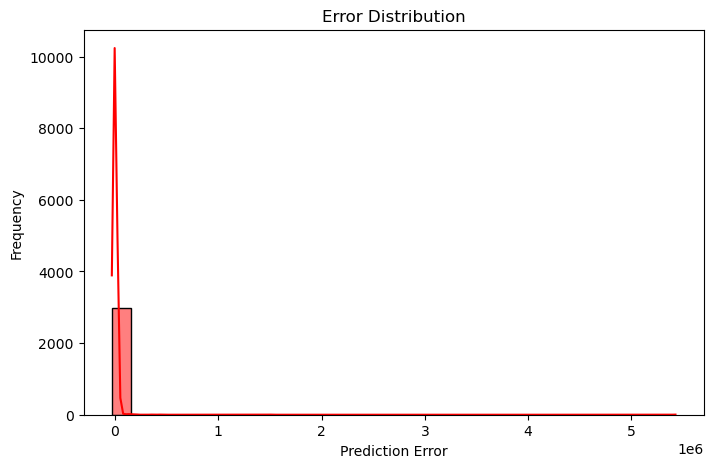

In [110]:
import seaborn as sns
import numpy as np

# Error calculation
errors = y_val - model.predict(X_val).flatten()

# Histogram of errors
plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, bins=30, color='red')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


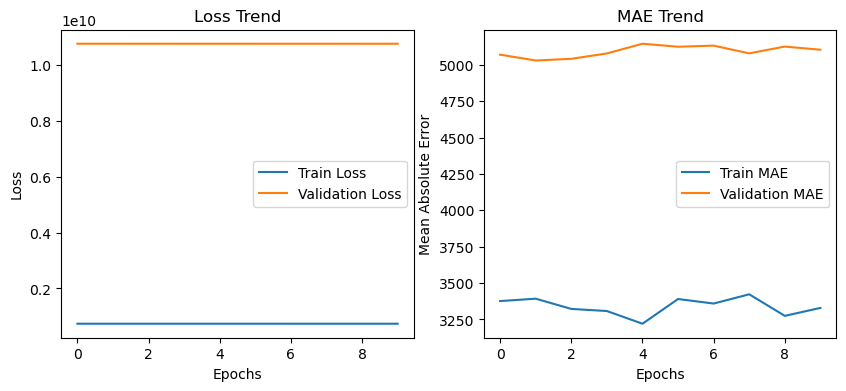

In [111]:
# Training loss & MAE plot
plt.figure(figsize=(10,4))

# Loss plot
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Trend")

# MAE plot
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title("MAE Trend")

plt.show()


In [112]:
print(test.columns)  


Index(['vidid', 'views', 'likes', 'dislikes', 'comment', 'published',
       'duration', 'category', 'predicted_adviews'],
      dtype='object')


C:\Users\ASUS\AppData\Local\Temp\ipykernel_16960\1566176795.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10["category"], y=top_10["predicted_adviews"], palette="coolwarm")


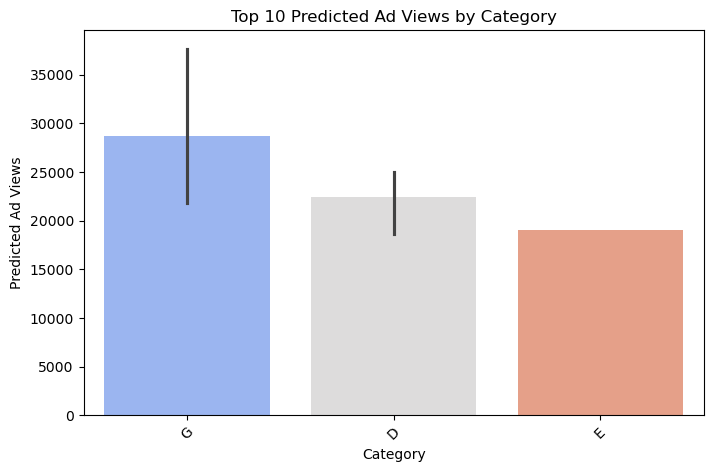

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 10 predictions plot
top_10 = test.nlargest(10, "predicted_adviews")

plt.figure(figsize=(8,5))
sns.barplot(x=top_10["category"], y=top_10["predicted_adviews"], palette="coolwarm")
plt.xlabel("Category")
plt.ylabel("Predicted Ad Views")
plt.title("Top 10 Predicted Ad Views by Category")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#THE END 